### Importing the libraries

In [5]:
from google.colab import drive
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
tf.__version__

'2.8.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [8]:
main_path = '/content/drive/MyDrive/DSs/CV_DS_1/P16-Convolutional-Neural-Networks/Part 2 - Convolutional Neural Networks/dataset/' # dowa
#main_path = '/content/drive/MyDrive/DS/CV_DS_1/P16-Convolutional-Neural-Networks/Part 2 - Convolutional Neural Networks/dataset/' # wazu
#main_path = '/content/drive/MyDrive/DSs/CV_DS_1/P16-Convolutional-Neural-Networks/Part 2 - Convolutional Neural Networks/dataset/' # went

In [9]:
image_size = 128
batch_size = 32

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory(main_path + 'training_set',
                                                 target_size = (image_size, image_size),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(main_path + 'test_set',
                                            target_size = (image_size, image_size),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [64]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [65]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[image_size, image_size, 3]))

### Step 2 - Pooling

In [66]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [67]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a third convolutional layer

In [68]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a fourth convolutional layer

In [69]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a fifth convolutional layer

In [70]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening and batch normalization

In [71]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.BatchNormalization())

### Step 4 - 2 Full Connections/dropouts

In [72]:
cnn.add(tf.keras.layers.Dense(units = 60, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units = 40, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

### Step 5 - Output Layer

In [73]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [74]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Callbacks

In [75]:
early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)

model_save_path = main_path + "model_save/weights-{epoch:02d}-{val_accuracy:.2f}.h5"
model_check_point = tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 100, callbacks = [model_check_point, early_stopper])

Epoch 1/100
250/250 [==============================] - ETA: 0s - loss: 0.6851 - accuracy: 0.5642
Epoch 1: val_accuracy improved from -inf to 0.50050, saving model to /content/drive/MyDrive/DSs/CV_DS_1/P16-Convolutional-Neural-Networks/Part 2 - Convolutional Neural Networks/dataset/model_save/weights-01-0.50.h5
250/250 [==============================] - 87s 342ms/step - loss: 0.6851 - accuracy: 0.5642 - val_loss: 0.6902 - val_accuracy: 0.5005
Epoch 2/100
250/250 [==============================] - ETA: 0s - loss: 0.6409 - accuracy: 0.6464
Epoch 2: val_accuracy improved from 0.50050 to 0.63200, saving model to /content/drive/MyDrive/DSs/CV_DS_1/P16-Convolutional-Neural-Networks/Part 2 - Convolutional Neural Networks/dataset/model_save/weights-02-0.63.h5
250/250 [==============================] - 80s 322ms/step - loss: 0.6409 - accuracy: 0.6464 - val_loss: 0.6301 - val_accuracy: 0.6320
Epoch 3/100
250/250 [==============================] - ETA: 0s - loss: 0.6158 - accuracy: 0.6781
Epoch 3:

In [ ]:
cnn.save(main_path+"/custom_cnn_model_2.h5")

In [15]:
cnn = tf.keras.models.load_model(main_path + 'model_save/weights-84-0.92.h5') # Uploading saved weight of 92% validation accuracy of 84rth epoch.

## Part 4 - Making a single prediction

In [16]:
test_image = image.load_img(main_path + 'single_prediction/cat_or_dog_2.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

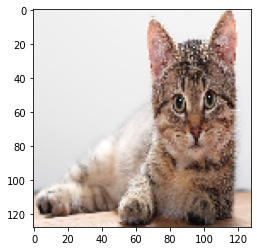

In [17]:
import matplotlib.pyplot as plt
test_image = image.load_img(main_path + 'single_prediction/cat_or_dog_2.jpg', target_size = (128, 128))
plt.imshow(test_image)

In [18]:
print(prediction)

cat
